In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install --quiet scvi-colab
from scvi_colab import install
install()

/home/chels/anaconda3/envs/thesis/lib/python3.8/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(


In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import torch
from velovi import preprocess_data, VELOVI
import scarches as sca
import matplotlib.pyplot as plt
import seaborn as sns

Global seed set to 0
/home/chels/anaconda3/envs/thesis/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/chels/anaconda3/envs/thesis/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## Expimap

### Prepare data 

In [ ]:
#adata = scv.datasets.pancreas()
adata=sc.read("data/Pancreas/full_processed_data.h5ad")

In [ ]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    batch_key="day",
    flavor="seurat_v3",
    subset=True
)

In [ ]:
adata.obs["day"] = adata.obs.day.map(lambda day: day.replace(" (reference)", "").replace(" (query)", ""))
adata_e=adata[adata.obs["day"]=="15.5"]

In [ ]:
data_path='data/Pancreas/'
sca.utils.add_annotations(adata, [data_path+'PanglaoDB_markers_27_Mar_2020.gmt',data_path+'reactome.gmt'], min_genes=5, clean=True)


In [ ]:
#Remove all genes not present in annotations
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [ ]:
#Filter out terms with less than 12 genes 
select_terms = adata.varm['I'].sum(0)>12
adata.uns['terms'] = np.array(adata.uns['terms'])[select_terms].tolist()
adata.varm['I'] = adata.varm['I'][:, select_terms]

In [ ]:
adata_e =adata

In [ ]:
#load model



### Prepare data velovi

In [15]:
adata = scv.datasets.pancreas()
#adata=sc.read("data/Pancreas/full_processed_data.h5ad")

In [5]:
adata.obs["day"] = adata.obs.day.map(lambda day: day.replace(" (reference)", "").replace(" (query)", ""))
adata=adata[adata.obs["day"]=="15.5"]

In [16]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 21611 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
adata = preprocess_data(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [18]:
data_path='data/Pancreas/'
sca.utils.add_annotations(adata, [data_path+'PanglaoDB_markers_27_Mar_2020.gmt',data_path+'reactome.gmt'], min_genes=5, clean=True)


In [19]:
#Remove all genes not present in annotations
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [20]:
#Filter out terms with less than 12 genes 
select_terms = adata.varm['I'].sum(0)>12
adata.uns['terms'] = np.array(adata.uns['terms'])[select_terms].tolist()
adata.varm['I'] = adata.varm['I'][:, select_terms]

In [22]:
#load model

vae=VELOVI.load('trained_models/velo_interpret_double_panglao_reactome2', adata)

INFO     File trained_models/velo_interpret_double_panglao_reactome2/model.pt already downloaded                   
Last Decoder layer: softmax


Get latent representation

In [23]:
adata.obsm["latent"]=vae.get_latent()

In [24]:
sc.pp.neighbors(adata, use_rep='latent')

In [25]:
sc.tl.umap(adata)

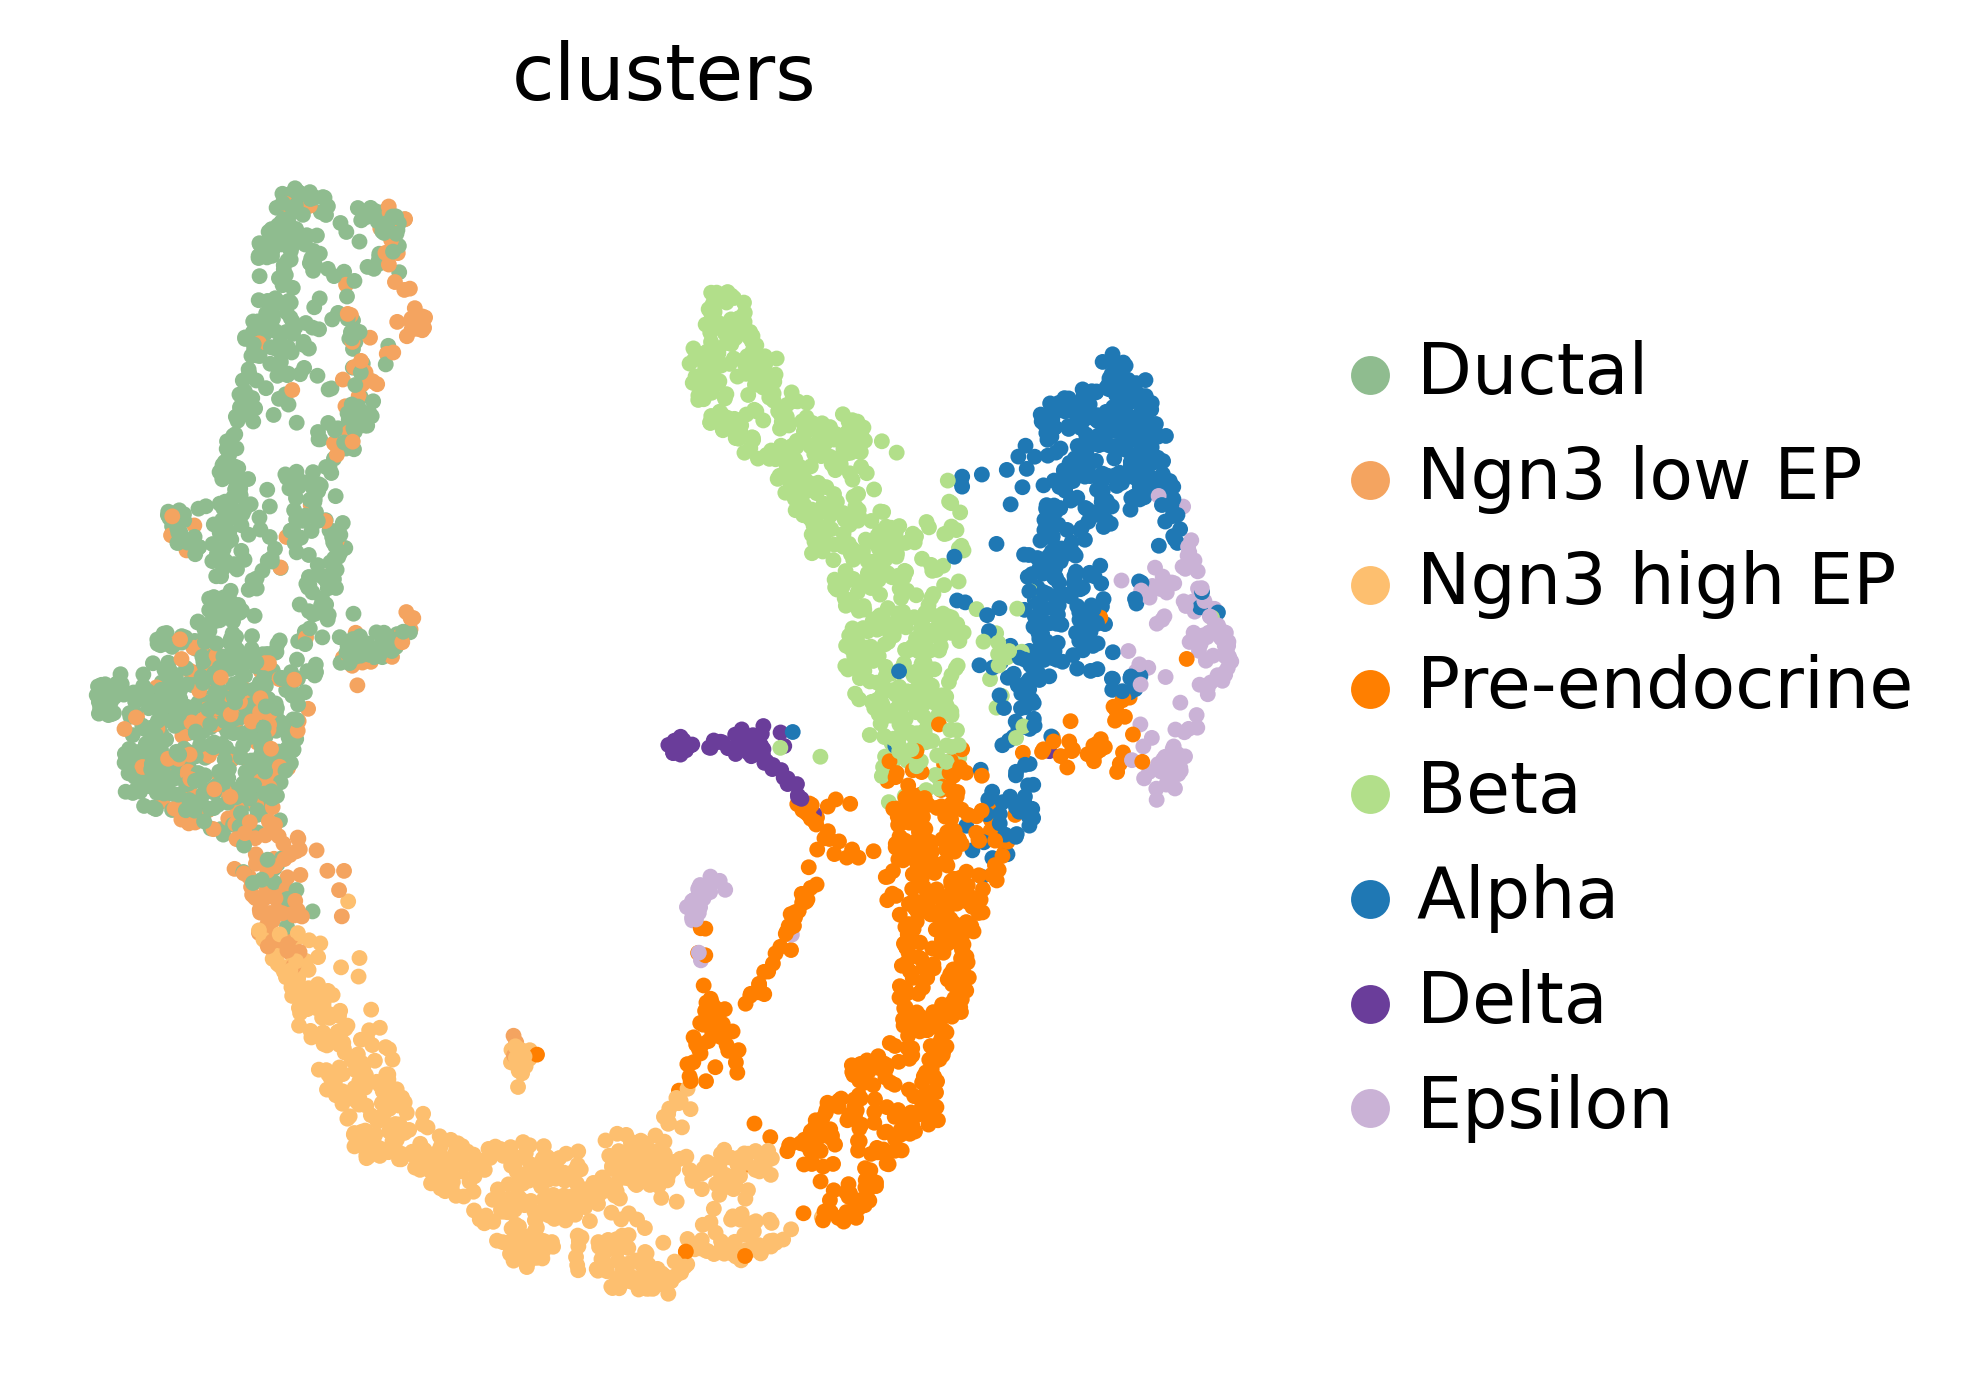

In [26]:
sc.pl.umap(adata, color='clusters', frameon=False)

Latent enrichment

In [27]:
scores_ct = vae.latent_enrich('clusters', adata=adata, exact=True)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                         

In [30]:
adata.uns["bf_scores"]

{'Pre-endocrine': {'p_h0': array([0.78, 0.42, 0.52, 0.77, 0.14, 0.7 , 0.29, 0.72, 0.72, 0.42, 0.52,
         0.68, 0.71, 0.47, 0.45, 0.64, 0.54, 0.78, 0.31, 0.8 , 0.8 , 0.44,
         0.65, 0.7 , 0.35, 0.58, 0.23, 0.51, 0.48, 0.52, 0.65, 0.36, 0.57,
         0.53, 0.4 , 0.36, 0.16, 0.44, 0.16, 0.67, 0.62, 0.65, 0.63, 0.28,
         0.67, 0.32, 0.68, 0.39, 0.48, 0.67, 0.45, 0.51], dtype=float32),
  'p_h1': array([0.22, 0.58, 0.48, 0.23, 0.86, 0.3 , 0.71, 0.28, 0.28, 0.58, 0.48,
         0.32, 0.29, 0.53, 0.55, 0.36, 0.46, 0.22, 0.69, 0.2 , 0.2 , 0.56,
         0.35, 0.3 , 0.65, 0.42, 0.77, 0.49, 0.52, 0.48, 0.35, 0.64, 0.43,
         0.47, 0.6 , 0.64, 0.84, 0.56, 0.84, 0.33, 0.38, 0.35, 0.37, 0.72,
         0.33, 0.68, 0.32, 0.61, 0.52, 0.33, 0.55, 0.49], dtype=float32),
  'bf': array([ 1.29, -0.33,  0.09,  1.19, -1.81,  0.82, -0.89,  0.94,  0.93,
         -0.32,  0.08,  0.75,  0.9 , -0.11, -0.21,  0.55,  0.18,  1.25,
         -0.8 ,  1.39,  1.38, -0.23,  0.63,  0.87, -0.61,  0.31, -1.2

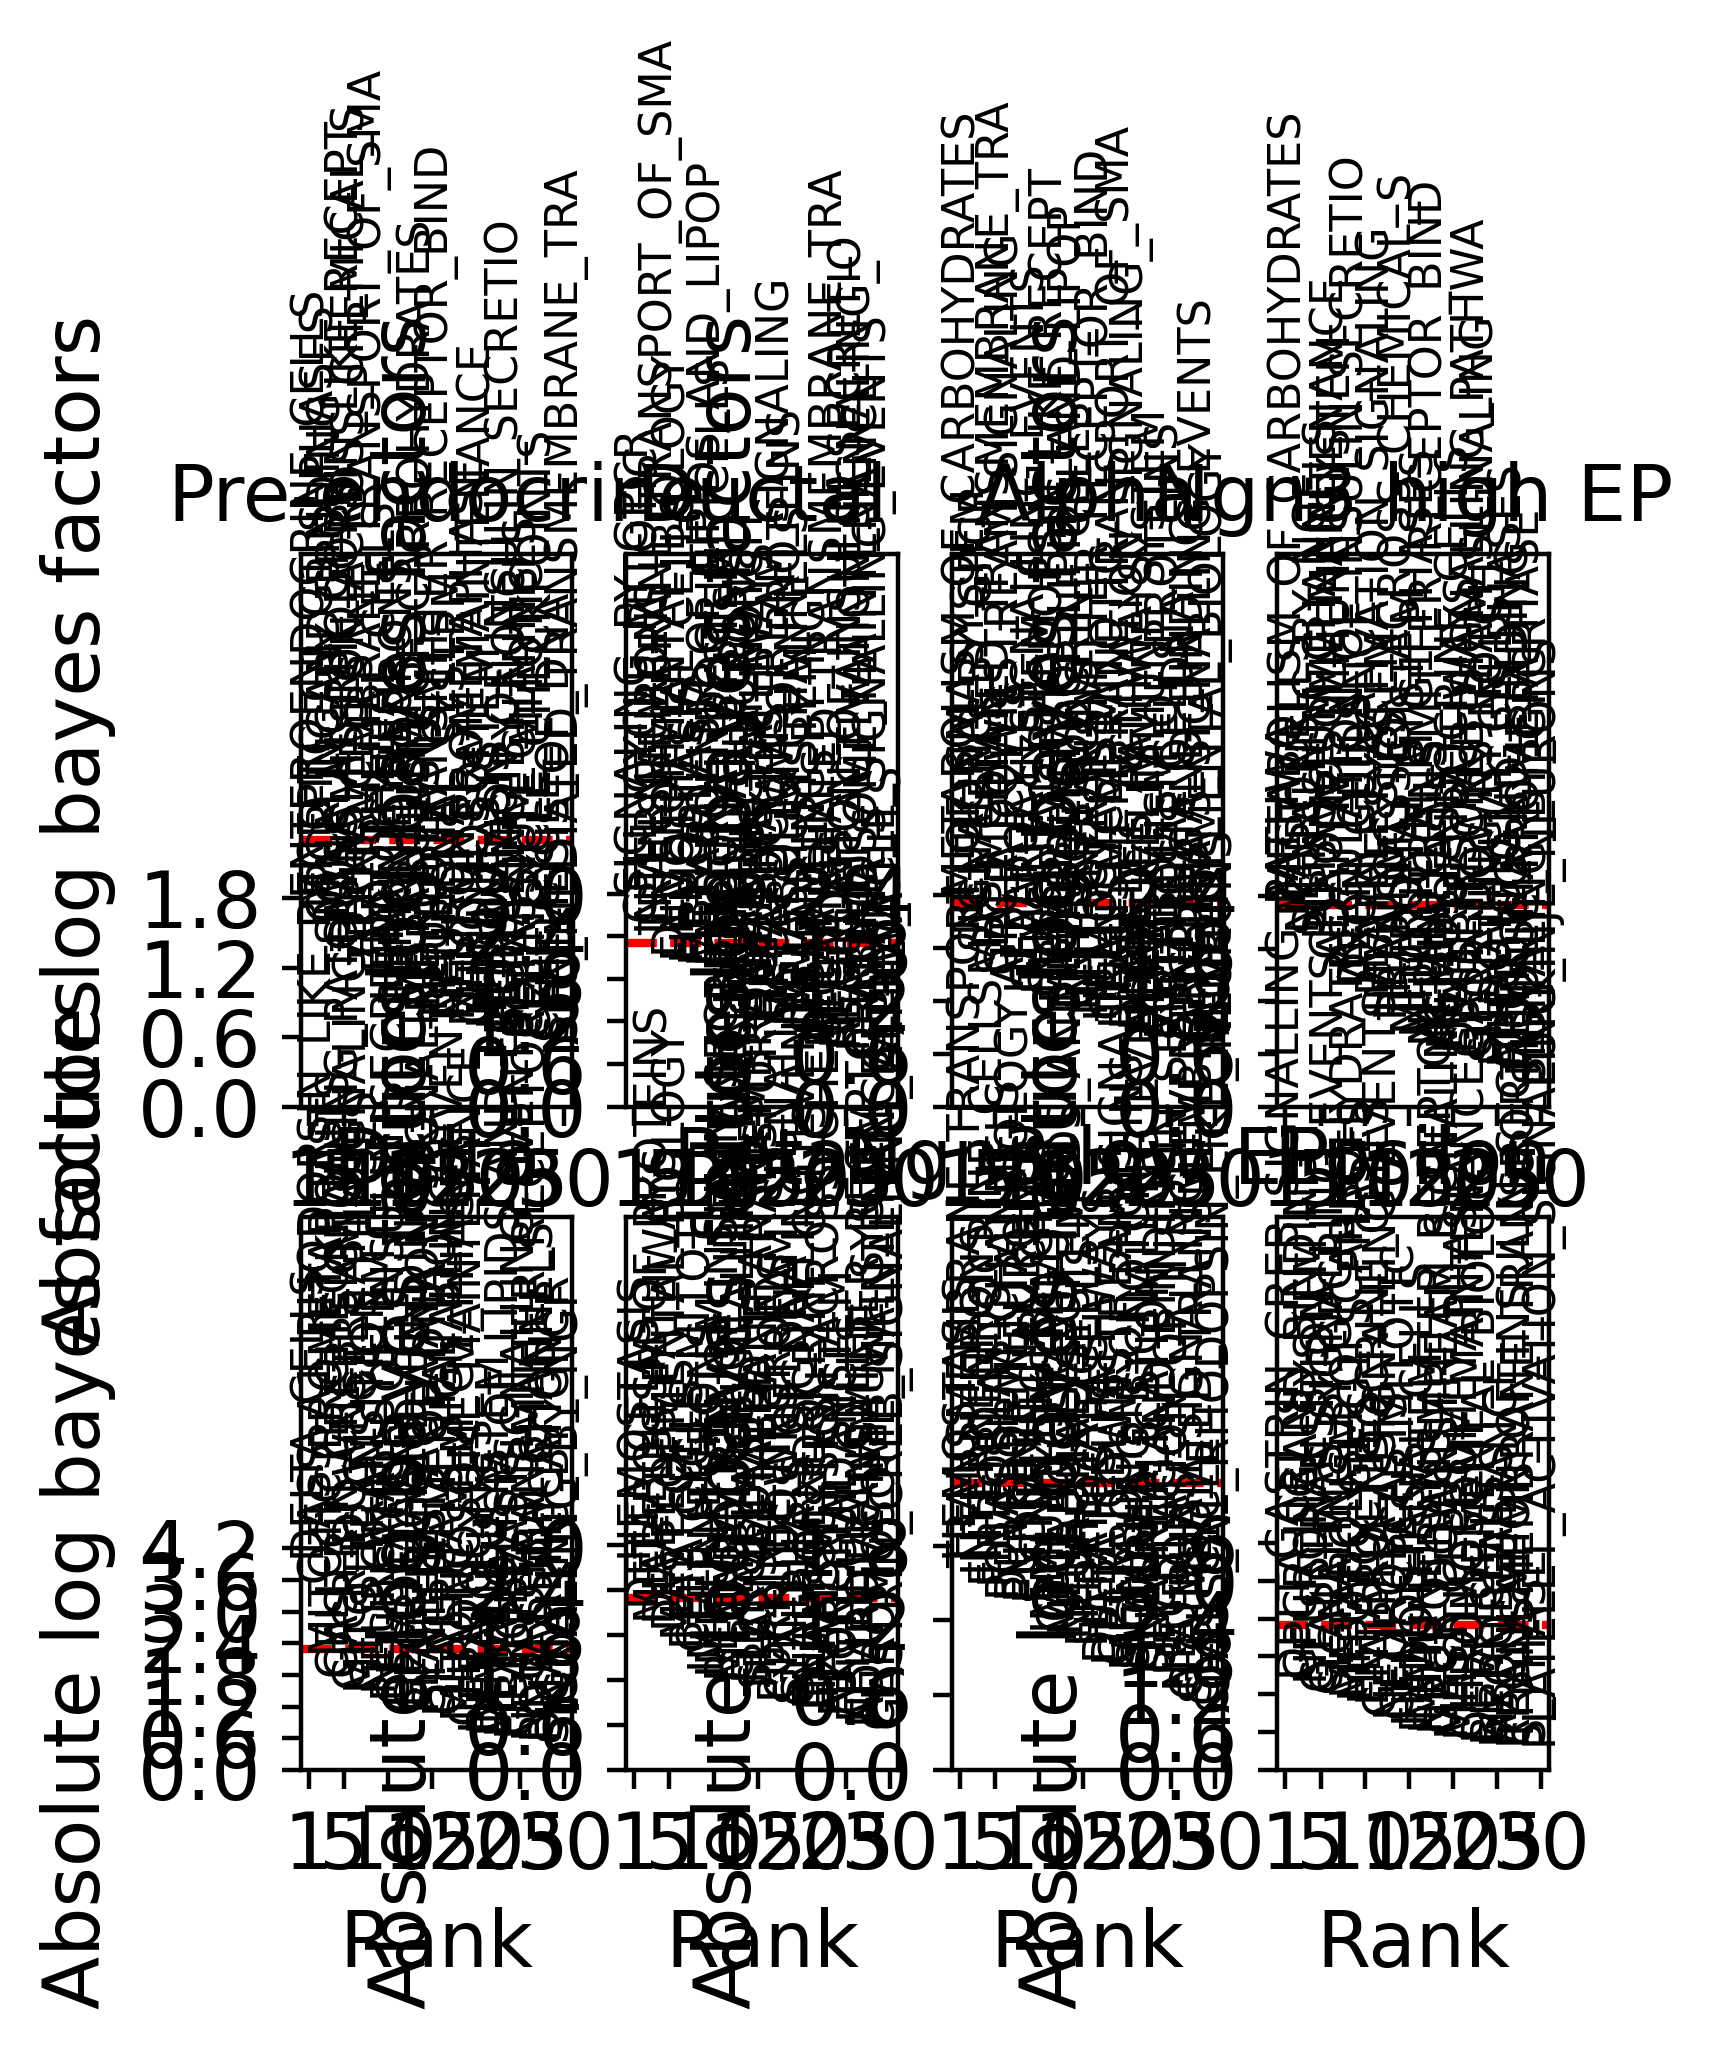

In [ ]:
fig = sca.plotting.plot_abs_bfs(adata, n_cols=4, scale_y=2.6, yt_step=0.6)

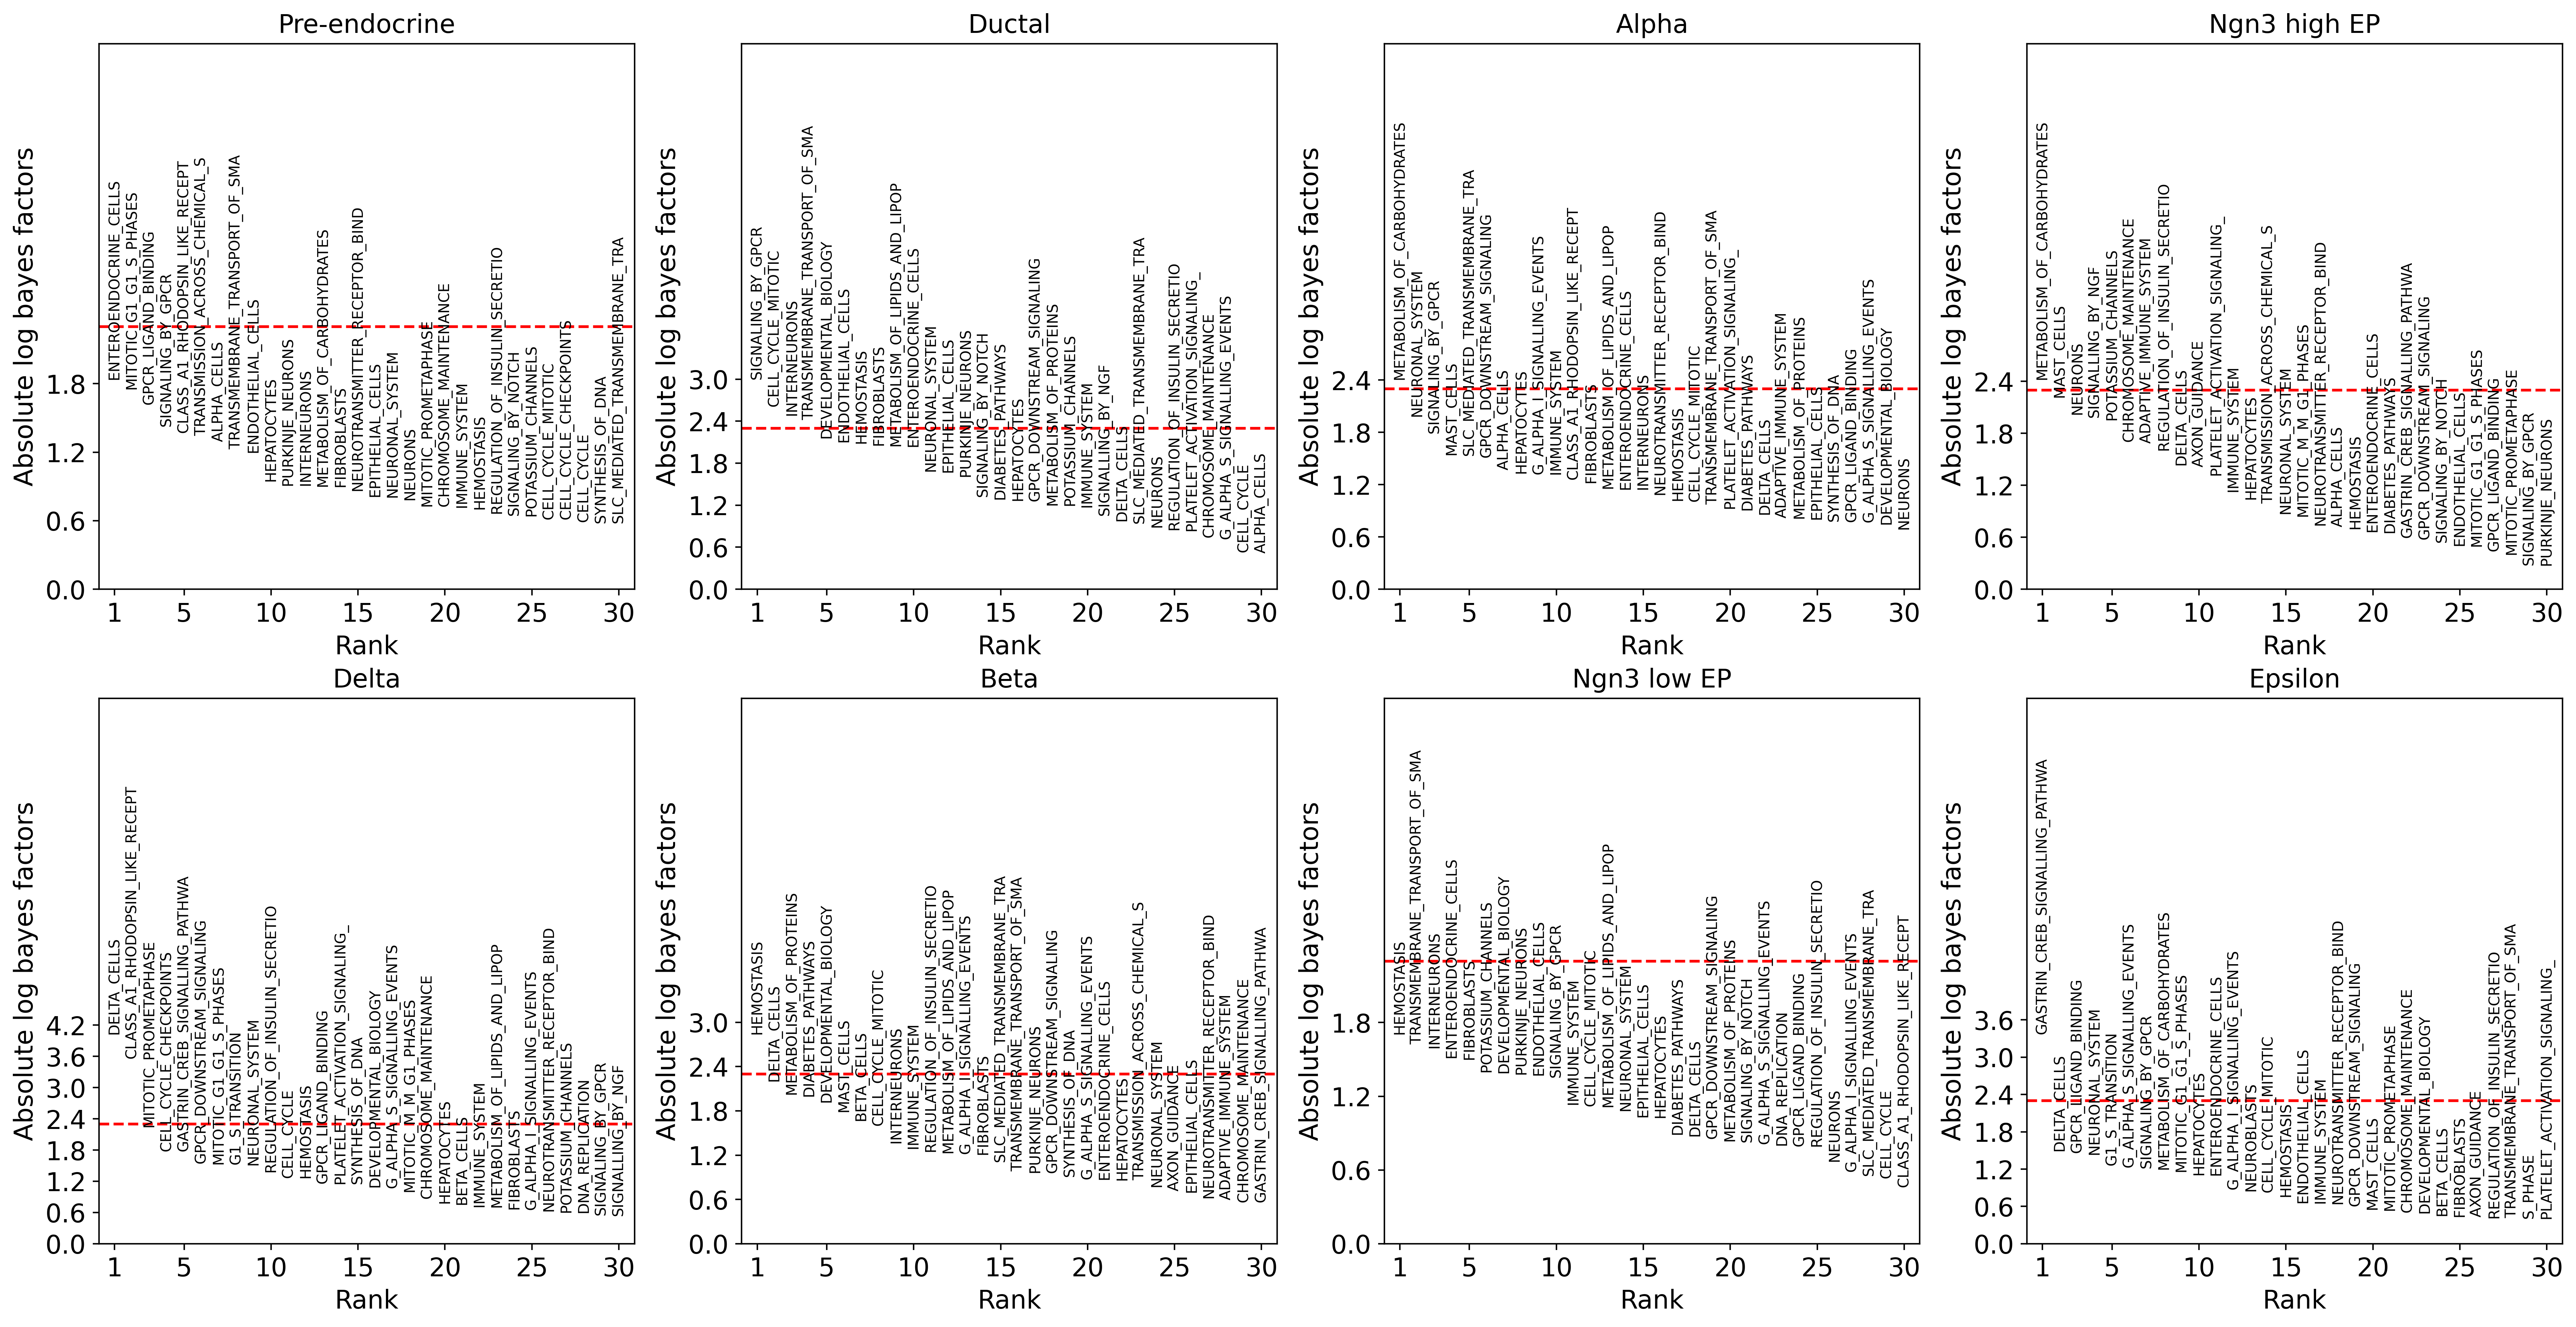

In [ ]:
fig.set_size_inches(24, 12)
fig

Plot latent space to visualize gene programs

In [ ]:
#get latent directions
vae.latent_directions()

In [ ]:
terms = adata.uns['terms']
terms

['ALPHA_CELLS',
 'BETA_CELLS',
 'DELTA_CELLS',
 'ENDOTHELIAL_CELLS',
 'ENTEROENDOCRINE_CELLS',
 'EPITHELIAL_CELLS',
 'FIBROBLASTS',
 'HEPATOCYTES',
 'INTERNEURONS',
 'MAST_CELLS',
 'NEUROBLASTS',
 'NEURONS',
 'PURKINJE_NEURONS',
 'SIGNALLING_BY_NGF',
 'DEVELOPMENTAL_BIOLOGY',
 'CELL_CYCLE',
 'GASTRIN_CREB_SIGNALLING_PATHWA',
 'TRANSMISSION_ACROSS_CHEMICAL_S',
 'NEURONAL_SYSTEM',
 'SIGNALING_BY_GPCR',
 'CLASS_A1_RHODOPSIN_LIKE_RECEPT',
 'INTEGRATION_OF_ENERGY_METABOLI',
 'CELL_CYCLE_MITOTIC',
 'NEUROTRANSMITTER_RECEPTOR_BIND',
 'CELL_CYCLE_CHECKPOINTS',
 'DIABETES_PATHWAYS',
 'TRANSMEMBRANE_TRANSPORT_OF_SMA',
 'METABOLISM_OF_PROTEINS',
 'G1_S_TRANSITION',
 'AXON_GUIDANCE',
 'REGULATION_OF_INSULIN_SECRETIO',
 'SLC_MEDIATED_TRANSMEMBRANE_TRA',
 'GPCR_DOWNSTREAM_SIGNALING',
 'G_ALPHA_I_SIGNALLING_EVENTS',
 'G_ALPHA_S_SIGNALLING_EVENTS',
 'SYNTHESIS_OF_DNA',
 'MITOTIC_G1_G1_S_PHASES',
 'MITOTIC_M_M_G1_PHASES',
 'GPCR_LIGAND_BINDING',
 'CHROMOSOME_MAINTENANCE',
 'METABOLISM_OF_LIPIDS_AND_LIP

In [ ]:
top_gps_per_cell = {}
for cell_type in set(adata.obs["clusters"]):
    top_gps_per_cell[cell_type] = []
    

In [ ]:
#Take significant GPs for each cell type: N lists
#for each cell type, plot accuracy of binary svm of sign. GPs (X_train: Bayes score for cells, Y_train: cell type vs rest)
#plot all

In [ ]:
select_terms = ['EPITHELIAL_CELLS', 'ENTEROENDOCRINE_CELLS',]
idx = [terms.index(term) for term in select_terms]

In [ ]:
latents = (adata.obsm["latent"]*adata.uns['directions'])[:, idx]

In [ ]:
adata.obs['EPITHELIAL_CELLS'] = latents[:, 0]
adata.obs['ENTEROENDOCRINE_CELLS'] = latents[:, 1]

#sc.pl.scatter(adata, x='GASTRIN_CREB_SIGNALLING_PATHWA', y='GPCR_LIGAND_BINDING', color='clusters', groups="Epsilon", size=10)#, save="2.png")

In [ ]:
#Fit SVM

In [ ]:

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(, y)